In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import sklearn.feature_selection
from sklearn.preprocessing import StandardScaler
import seaborn as seabornInstance 

# Importing Data

In [2]:
data=pd.read_csv("C:/Users/hp/Desktop/new/local-weather.csv")
print(data.head(5))
print(data.shape)

  fogground  snowfall dust  snowdepth mist drizzle hail  fastest2minwindspeed  \
0        No       0.0   No        0.0  Yes      No   No                 17.90   
1        No       0.0   No        0.0   No      No   No                 23.04   
2        No       0.0   No        0.0   No      No   No                 21.03   
3        No       0.0   No        0.0   No      No   No                 23.94   
4        No       0.0   No        0.0   No      No   No                 16.11   

  thunder glaze  ... freezingrain rain highwind        date  precipitation  \
0      No    No  ...           No  Yes       No  2007-01-06           0.13   
1      No    No  ...           No  Yes       No  2007-01-09           0.00   
2      No    No  ...           No   No       No  2007-01-14           0.00   
3      No    No  ...           No   No       No  2007-01-15           0.00   
4      No    No  ...           No   No       No  2007-01-20           0.00   

  fogheavy  smokehaze avgwindspeed fastest2m

# Handling Duplicate Values

In [3]:
#Checking Duplicate records
dup=data.duplicated()
sum(dup)

0

# Feature Transformation- date column

In [4]:
#converting date column to datatime
data['date'] = pd.to_datetime(data['date'])

In [5]:
#Splitting date into 3 seperate coloumns year, month and da
data['date_year']= data['date'].dt.year
data['date_month']= data['date'].dt.month
data['date_day']= data['date'].dt.day

In [6]:
#Dropping date column
data=data.drop('date',1)

In [7]:
data

,fogground,snowfall,dust,snowdepth,mist,drizzle,hail,fastest2minwindspeed,thunder,glaze,...,highwind,precipitation,fogheavy,smokehaze,avgwindspeed,fastest2minwinddir,fastest5secwinddir,date_year,date_month,date_day
0,No,0.0,No,0.0,Yes,No,No,17.90,No,No,...,No,0.13,No,No,8.05,230.0,230.0,2007,1,6
1,No,0.0,No,0.0,No,No,No,23.04,No,No,...,No,0.00,No,No,7.61,280.0,270.0,2007,1,9
2,No,0.0,No,0.0,No,No,No,21.03,No,No,...,No,0.00,No,No,8.50,230.0,230.0,2007,1,14
3,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0.00,No,No,13.20,230.0,230.0,2007,1,15
4,No,0.0,No,0.0,No,No,No,16.11,No,No,...,No,0.00,No,No,4.92,290.0,320.0,2007,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,No,0.0,No,0.0,No,No,No,23.94,No,No,...,No,0.00,No,No,11.41,230.0,230.0,2020,3,9
4843,No,0.0,No,0.0,No,No,No,17.00,Yes,No,...,No,0.86,No,No,7.16,280.0,280.0,2020,3,25
4844,No,0.0,No,0.0,No,No,No,14.99,No,No,...,No,0.00,No,No,5.14,230.0,230.0,2020,3,26
4845,No,0.0,No,0.0,No,No,No,17.00,No,No,...,No,0.00,No,No,8.50,240.0,230.0,2020,3,27


# Feature Encoding

In [8]:
#list of catogorical featres to be encoded
todummy_list=['fogground','dust','mist','drizzle','rain','hail','thunder','glaze','snow','ice','fog','freezingfog','blowingsnow','freezingrain','highwind','fogheavy','smokehaze']

In [9]:
#Encoding the features by adding dummies
def dummy_df(data, todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(data[x], prefix=x, dummy_na=False)
        data=data.drop(x,1)
        data=pd.concat([data,dummies],axis=1)
    return data

In [10]:
#Merging the dummy variables with the data
df=dummy_df(data,todummy_list)
print(df.head(5))

   snowfall  snowdepth  fastest2minwindspeed  temperaturemin  \
0       0.0        0.0                 17.90            50.0   
1       0.0        0.0                 23.04            30.0   
2       0.0        0.0                 21.03            50.0   
3       0.0        0.0                 23.94            57.0   
4       0.0        0.0                 16.11            26.1   

   fastest5secwindspeed  temperaturemax  precipitation  avgwindspeed  \
0                 21.92            71.1           0.13          8.05   
1                 29.08            55.0           0.00          7.61   
2                 25.05            73.9           0.00          8.50   
3                 29.08            73.9           0.00         13.20   
4                 21.03            48.0           0.00          4.92   

   fastest2minwinddir  fastest5secwinddir  ...  blowingsnow_No  \
0               230.0               230.0  ...               1   
1               280.0               270.0  ...    

# Handling Missing Values

In [11]:
#imputer to handle missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
df=pd.DataFrame(data=imp.transform(df),columns=df.columns)

In [12]:
df.isnull().sum()

snowfall                0
snowdepth               0
fastest2minwindspeed    0
temperaturemin          0
fastest5secwindspeed    0
temperaturemax          0
precipitation           0
avgwindspeed            0
fastest2minwinddir      0
fastest5secwinddir      0
date_year               0
date_month              0
date_day                0
fogground_No            0
fogground_Yes           0
dust_No                 0
dust_Yes                0
mist_No                 0
mist_Yes                0
drizzle_No              0
drizzle_Yes             0
rain_No                 0
rain_Yes                0
hail_No                 0
hail_Yes                0
thunder_No              0
thunder_Yes             0
glaze_No                0
glaze_Yes               0
snow_No                 0
snow_Yes                0
ice_No                  0
ice_Yes                 0
fog_No                  0
fog_Yes                 0
freezingfog_No          0
freezingfog_Yes         0
blowingsnow_No          0
blowingsnow_

In [13]:
df.temperaturemax

0       71.1
1       55.0
2       73.9
3       73.9
4       48.0
        ... 
4842    69.1
4843    57.0
4844    61.0
4845    81.0
4846    77.0
Name: temperaturemax, Length: 4847, dtype: float64

# Outlier Detection

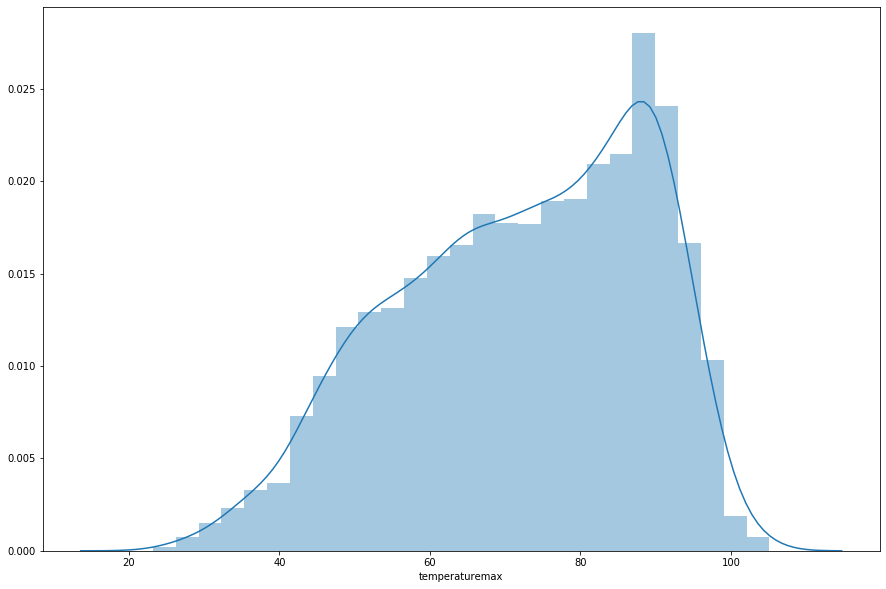

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df.temperaturemax)

In [15]:
#sPlitting the data into independent and dependent columns
x=df.drop('temperaturemax',1) #dependent
y=df.temperaturemax         #Independent

In [16]:
x.shape

(4847, 46)

In [17]:

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.70, random_state=1)
print(data.shape)
print(x.shape)

(4847, 30)
(4847, 46)


# Feature Selection

In [18]:
select=sklearn.feature_selection.SelectKBest(k=22)
selected_features=select.fit(x_train,y_train)
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[x.columns[i] for i in indices_selected]
x_train=x_train[colnames_selected]
x_test=x_test[colnames_selected]

In [19]:
colnames_selected

['snowfall',
 'snowdepth',
 'fastest2minwindspeed',
 'temperaturemin',
 'avgwindspeed',
 'date_month',
 'drizzle_No',
 'drizzle_Yes',
 'thunder_No',
 'thunder_Yes',
 'glaze_No',
 'glaze_Yes',
 'snow_No',
 'snow_Yes',
 'ice_No',
 'ice_Yes',
 'freezingfog_No',
 'freezingfog_Yes',
 'freezingrain_No',
 'freezingrain_Yes',
 'smokehaze_No',
 'smokehaze_Yes']

# Feature Scaling

In [20]:
#feature scaling(-1 and 1) will make alogorithm fast to run
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# Applying Linear Regression model

In [21]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred= regressor.predict(x_test)



In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))
df1=df.head(10)

      Actual  Predicted
910     84.0  77.936381
1715    90.0  91.268412
4701    91.9  86.811381
2776    75.9  84.045756
4285    93.0  90.444193
3600    55.9  52.174662
200     96.1  91.819193
772     88.0  80.645609
4300    72.0  68.491068
4079    55.9  62.108256


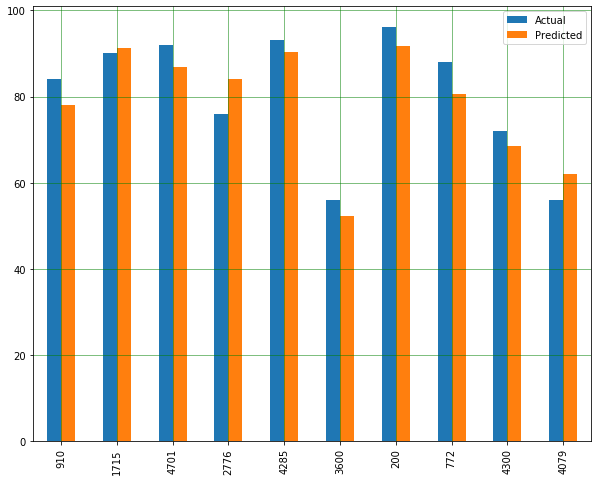

In [23]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", regressor.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value*100,"%")

Intercept: 
 72.08408601305324
Root Mean Square Error 
 6.403236864151143
R^2 Value: 
 84.5176126973423 %


In [25]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(regressor,X = x_train, y = y_train, cv=10, scoring='neg_mean_absolute_error')
print("neg_mean_absolute_error: %.3f (%.3f)" % (results.mean(), results.std()))

neg_mean_absolute_error: -5.174 (0.228)


In [26]:

results = cross_val_score(regressor,X = x_train, y = y_train, cv=10, scoring='neg_mean_squared_error')
print("neg_mean_squared_error: %.3f (%.3f)" % (results.mean(), results.std()))

neg_mean_squared_error: -42.458 (3.622)
